IDS 472 HM3 03/06/25 Arturo Perez, Artem Larin, Krima Mehta, Ihor Sepura

Question 1

1.a

In [18]:
import pandas as pd
import numpy as np

# data = pd.read_csv('/Users/arturoperezespinosa/Downloads/Tayko.csv') # Arthur

data = pd.read_csv('../data/Tayko.csv') #Artem

categorical_cols = [col for col in data.columns if data[col].nunique() == 2]

pivot_tables = {}

for col in categorical_cols:

    pivot = data.pivot_table(index=col, values='Spending', aggfunc=['mean', 'std'])

    pivot_tables[col] = pivot

    print(f"{col}'s pivot table:\n", pivot, "\n")


US's pivot table:
           mean         std
      Spending    Spending
US                        
0   101.216524  174.844401
1   102.924803  189.275664 

source_a's pivot table:
                 mean         std
            Spending    Spending
source_a                        
0          89.532914  170.619347
1         193.027668  256.237588 

source_c's pivot table:
                 mean         std
            Spending    Spending
source_c                        
0         104.405720  188.320220
1          72.607143  156.313692 

source_b's pivot table:
                 mean         std
            Spending    Spending
source_b                        
0         105.391489  190.034183
1          59.283333  117.554935 

source_d's pivot table:
                 mean         std
            Spending    Spending
source_d                        
0         102.498696  188.636489
1         105.542169  137.992780 

source_e's pivot table:
                 mean         std
            Spendi

1.b

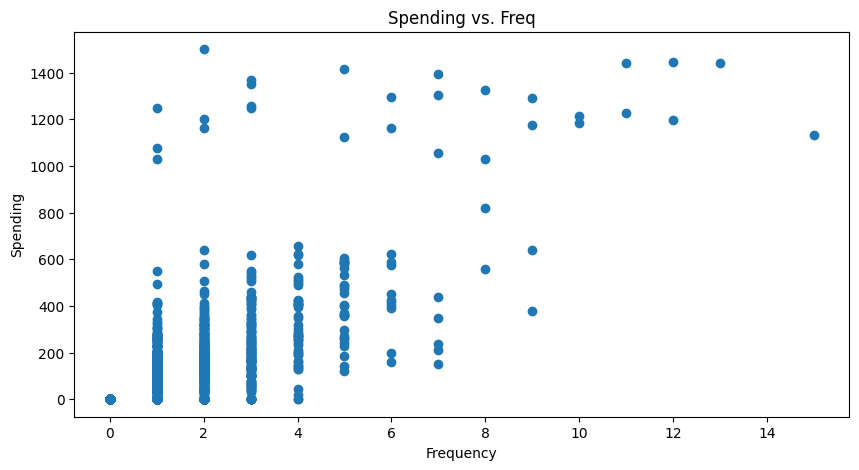

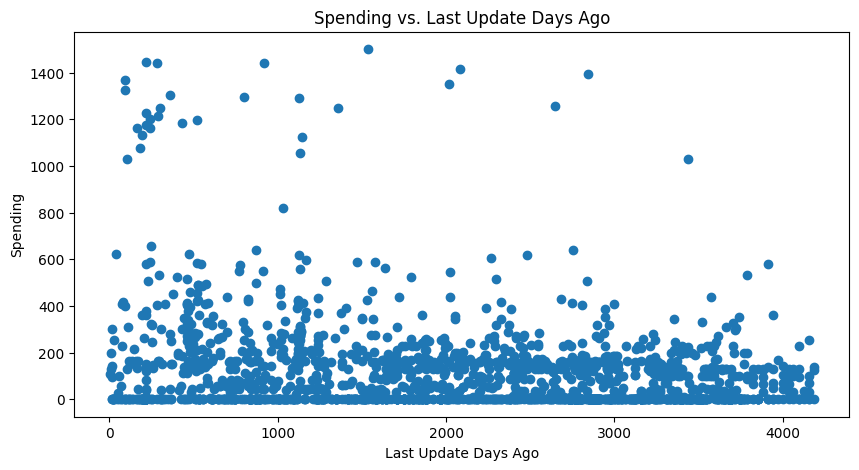

In [19]:
import matplotlib.pyplot as plt

#Spending V Freq plot

plt.figure(figsize=(10, 5))

plt.scatter(data['Freq'], data['Spending'])

plt.title('Spending vs. Freq')

plt.xlabel('Frequency')

plt.ylabel('Spending')

plt.show()

# Spending V Update plot

plt.figure(figsize=(10, 5))

plt.scatter(data['last_update_days_ago'], data['Spending'])

plt.title('Spending vs. Last Update Days Ago')

plt.xlabel('Last Update Days Ago')

plt.ylabel('Spending')

plt.show()


From running our analysis, there doesn't seem to be a linear relationship in any plot.

1.c

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error 

X = data[['Freq', 'last_update_days_ago'] + categorical_cols]  

y = data['Spending']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

coefficients = model_lr.coef_

intercept = model_lr.intercept_

print("Coefficients:", coefficients)

print("Intercept:", model_lr.intercept_)

Coefficients: [ 7.91912752e+01 -1.01073089e-02 -1.39444242e+00  5.51949397e+00
 -5.92911033e+01 -1.73968688e+01 -5.24469356e+01 -2.56287193e+01
 -4.63304285e+01  1.29972961e+01 -8.79378506e+01  8.89558216e+00
 -3.19979050e+01 -3.07744220e+01 -9.13790145e+00 -6.72222241e+01
 -2.20373434e+01 -1.72883638e+01 -1.26786280e+00 -1.16668074e+00
 -6.57496716e+01  8.58002252e+01]
Intercept: 5.21098638552597


In [21]:
lasso = Lasso(alpha = .1)

lasso.fit(X_train, y_train)

lasso_coefficients = lasso.coef_

print("Lasso Coefficients:", lasso_coefficients)

predictions = model_lr.predict(X_validation)

mse = mean_squared_error(y_validation, predictions)

print("Mean Squared Error:", mse)


Lasso Coefficients: [ 7.89565729e+01 -1.00516375e-02 -9.17635843e-01  2.12393078e+01
 -4.14353666e+01 -1.91169922e-01 -3.39456539e+01 -8.97075303e+00
 -2.38731249e+01  2.52914170e+01 -7.00942044e+01  2.35928331e+01
 -1.39211253e+01 -9.79730554e+00  6.48025379e+00 -3.49875690e+01
 -8.03840575e-01 -1.98624722e-01 -8.56182080e-01 -7.75571781e-01
 -6.58253952e+01  8.44652745e+01]
Mean Squared Error: 14818.367352850726


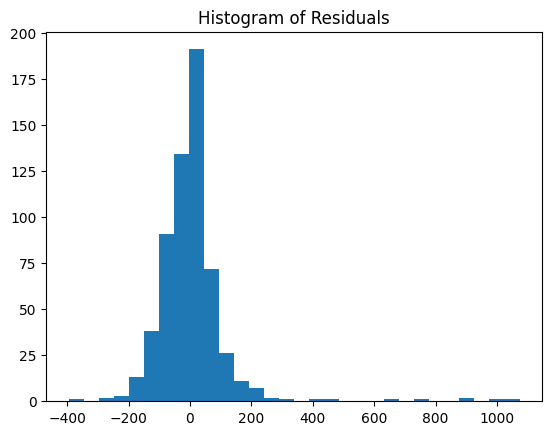

In [22]:
residuals = y_validation - predictions

plt.hist(residuals, bins=30)

plt.title('Histogram of Residuals')

plt.show()

Our model is slightly right skewed. This indicates more small than large errors. The model's prediction can be unreliable. 

c:\Users\larin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


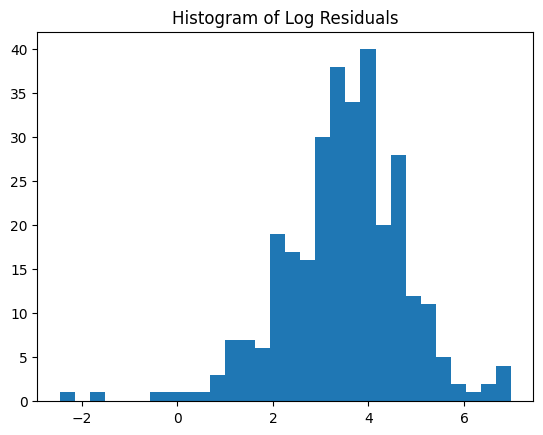

In [23]:
plt.hist(np.log(residuals), bins=30)
plt.title('Histogram of Log Residuals')
plt.show()